Assignment 1</br>
Applied Data Science
---



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/zomato.csv", sep=";")

Name: Soumyojyoti Dutta</br>
Roll No: 10</br>
Moodle ID: 19102014

---



The basic idea of analysing the Zomato dataset is to get a fair idea about the factors affecting
the aggregate rating of each restaurant, establishment of different types of restaurants at different
places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving
dishes from all over the world. With each day new restaurants opening the industry has not been
saturated yet and the demand is increasing day by day. Despite increasing demand, it however has
become difficult for new restaurants to compete with established restaurants. Most of them serving
the same food. Bengaluru being an IT capital of India. Most of the people here are dependent
mainly on the restaurant food as they do not have time to cook for themselves. With such an
overwhelming demand of restaurants it has therefore become important to study the demography
of a location.


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category = 'FutureWarning')

In [ ]:
import re

In [ ]:
zomato_df = pd.read_csv('/content/drive/MyDrive/BDA/zomato.csv') #importing dataset
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
zomato_df.shape

(51717, 17)

Preprocessing the data

In [ ]:
zomato_df.isnull().sum() #getting total number of null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
avg = []
for i in range(len(zomato_df)):
    l = list(map(int, re.findall(r'%s(\d+)' % 'Rated ',zomato_df['reviews_list'][i])))
    if len(l) >0:
        avg.append(round(sum(l)/len(l), 2))
    else:
        avg.append(0)

In [ ]:
zomato_df['review_rates'] = pd.Series(avg)

In [ ]:
zomato_df.dropna(inplace = True) #removing null values from the dataset

In [ ]:
zomato_df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
review_rates                   0
dtype: int64

In [ ]:
zomato_df.shape

(23193, 18)

In [ ]:
zomato_df.describe()

,votes,review_rates
count,23193.000000,23193.000000
mean,601.074462,3.655923
std,1114.854301,0.753049
min,0.000000,0.000000
25%,101.000000,3.320000
50%,221.000000,3.800000
75%,586.000000,4.100000
max,16832.000000,5.000000


There are some attributes which has no use in analysis. We can remove them

In [ ]:
zomato_df.drop(['url'], axis=1,inplace = True)

In [ ]:
zomato_df.drop(['address'], axis=1,inplace = True)

In [ ]:
zomato_df.drop(['phone'], axis=1,inplace = True)

In [ ]:
zomato_df.drop(['menu_item'], axis=1,inplace = True)

In [ ]:
zomato_df.drop(['location'], axis=1,inplace = True)

In [ ]:
zomato_df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),review_rates
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.08
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3.57
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.15
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.51
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,4.00


In [ ]:
rate = []
for index, data in enumerate(zomato_df.rate):
    if (data is not np.nan) & (data != 'NEW') & (data != '-'):
        rate.append(float(data.split('/')[0]))
    else:
        rate.append(data)

In [ ]:
zomato_df['rate'] = pd.Series(rate)

In [ ]:
zomato_df.rename(columns={'cuisines' : 'Cuisine', 'listed_in(city)': 'Locality', 'listed_in(type)' : 'Listed_Type', 'approx_cost(for two people)': 'Approx_Cost', 'name': 'Name', 'rest_type':'Restaurant_Type', 'rate' : 'Rating', 'votes' : 'Total_Votes', 'online_order': 'Online_Order','book_table':'Table_Booking', 'dish_liked' : 'Dishes_Liked' }, inplace = True)
zomato_df.columns

Index(['Name', 'Online_Order', 'Table_Booking', 'Rating', 'Total_Votes',
       'Restaurant_Type', 'Dishes_Liked', 'Cuisine', 'Approx_Cost',
       'reviews_list', 'Listed_Type', 'Locality', 'review_rates'],
      dtype='object')

In [ ]:
 #Lets drop the data points with na and 0 rates:
zomato_df.drop(zomato_df[(zomato_df['review_rates'] == 0) & (zomato_df['Rating'].isna())].index, inplace=True)
# Replacing NaNs and '-' of rate with review rate values:
zomato_df['Rating'] = np.where(zomato_df.Rating.isna(), zomato_df.review_rates, zomato_df.Rating)
zomato_df['Rating'] = np.where(zomato_df['Rating'] == '-', zomato_df.review_rates, zomato_df.Rating)
#After dropping Nas 
zomato_df.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,reviews_list,Listed_Type,Locality,review_rates
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,4.08
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3.57
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.15
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.51
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,4.00


In [ ]:
zomato_df.drop(['reviews_list'], axis=1,inplace = True)

In [ ]:
# Lets save the newly opened restaurants in new DF before removing them:
zomato_New = zomato_df[zomato_df['Rating'] == 'NEW']
zomato_df.drop(zomato_df.Rating[zomato_df.Rating == 'NEW'].index, inplace=True)

In [ ]:
zomato_df.dropna(subset=['Approx_Cost', 'Cuisine'], inplace = True)
#Dropping Reviews List and review_rates since we have used it to fill our Rating column and we dont need these:
zomato_df.drop(['review_rates'], axis =1, inplace=True)
zomato_df.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
#removing non numeric characters

In [ ]:
zomato_df['Rating'] = zomato_df['Rating'].apply(pd.to_numeric)
zomato_df['Approx_Cost'].replace(',', '',regex=True, inplace=True)
zomato_df['Approx_Cost'] = zomato_df['Approx_Cost'].apply(pd.to_numeric)
zomato_df['Name'].replace({r'[^\x00-\x7F]+':''}, regex = True, inplace=True)
# type(zomato['Approx_Cost'][0])
zomato_df.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


Encoding Categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()

In [ ]:
zomato_df['Online_Order'] = labelencoder_df.fit_transform(zomato_df['Online_Order'])
zomato_df['Table_Booking'] = labelencoder_df.fit_transform(zomato_df['Table_Booking'])

Data visualization

4.00    2885
3.90    1522
4.10    1301
3.80    1243
4.20    1028
        ... 
1.62       1
2.02       1
2.32       1
1.93       1
4.84       1
Name: Rating, Length: 315, dtype: int64


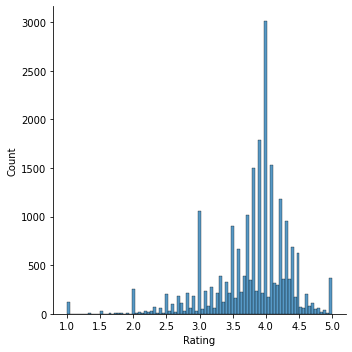

In [ ]:
#Checking the rating distribution
#plt.figure(figsize=(8,6)
sns.displot(zomato_df['Rating'])
print(zomato_df.Rating.value_counts())

In [ ]:
rating = zomato_df.Rating
print("Maximum rating = ", np.max(rating))

Maximum rating =  5.0


In [ ]:
sorted_df = zomato_df.sort_values(by=['Rating'], ascending=False)


List Of top 20 resturants

In [ ]:
sorted_df.head(20)

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
29726,Kuttanadu,1,0,5.0,261,Casual Dining,"Pothichoru, Kerala Parotta, Beef Fry, Vegetabl...","Kerala, Chinese, Seafood, North Indian",700,Delivery,Koramangala 5th Block
48897,BOX8- Desi Meals,1,0,5.0,170,"Takeaway, Delivery","Paratha, Dal Makhani, Biryani, Gulab Jamun, Sa...","North Indian, Mughlai, Fast Food",500,Delivery,Sarjapur Road
27934,Tandoor-De-Naal,0,0,5.0,35,"Takeaway, Delivery","Rolls, Chicken Roll, Paneer Roll, Pasta",Fast Food,200,Delivery,Koramangala 4th Block
28060,Fogg,0,1,5.0,0,Quick Bites,"Pizza, Mocktails","Fast Food, Chinese",200,Delivery,Koramangala 4th Block
28105,Halo Chef,1,0,5.0,145,Delivery,Biryani,North Indian,500,Delivery,Koramangala 4th Block
28194,Krispy Kreme,1,0,5.0,448,Dessert Parlor,"Donut, Coffee, Chocolate Dreamcake, Latte, Hot...","Desserts, Beverages",300,Desserts,Koramangala 4th Block
48817,Aqua - The Park Bangalore,0,1,5.0,196,"Lounge, Bar","Cocktails, Mai Thai, Pizza, Lemon Basil Chicken","North Indian, Mediterranean, Chinese",3000,Drinks & nightlife,Residency Road
28200,Juicy,0,0,5.0,43,Beverage Shop,"Sandwiches, Mango Shake","Beverages, Juices, Fast Food",200,Desserts,Koramangala 4th Block
43227,Domino's Pizza,1,0,5.0,121,Quick Bites,"Pizza, Garlic Bread","Pizza, Fast Food",400,Dine-out,MG Road
43108,Natural Ice Cream,0,0,5.0,222,Dessert Parlor,"Mango Ice Cream, Tender Coconut Ice Cream, Chi...","Ice Cream, Beverages",200,Desserts,MG Road


1    16266
0     6775
Name: Online_Order, dtype: int64


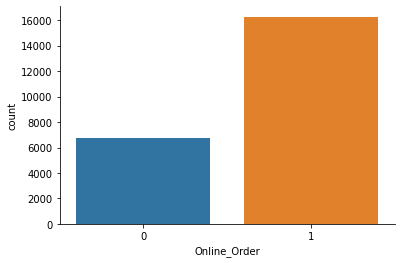

In [ ]:
sns.countplot(x='Online_Order', data=zomato_df)
sns.despine()
print(zomato_df.Online_Order.value_counts())

16266 resturants offer online order service

0    16973
1     6068
Name: Table_Booking, dtype: int64


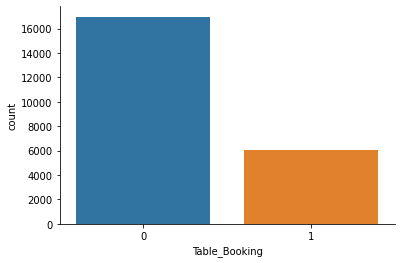

In [ ]:
sns.countplot(x='Table_Booking', data=zomato_df)
sns.despine()
print(zomato_df.Table_Booking.value_counts())

16973 resturants has book table service

BTM                      1412
Koramangala 7th Block    1354
Koramangala 4th Block    1340
Koramangala 5th Block    1301
Koramangala 6th Block    1238
Jayanagar                1045
Indiranagar              1019
MG Road                  1010
Church Street             972
Brigade Road              959
Lavelle Road              888
Residency Road            832
JP Nagar                  813
Old Airport Road          741
HSR                       733
Whitefield                621
Marathahalli              619
Basavanagudi              596
Brookefield               594
Bannerghatta Road         542
Frazer Town               540
Kammanahalli              530
Kalyan Nagar              517
Sarjapur Road             498
Bellandur                 493
Malleshwaram              487
Rajajinagar               371
Banashankari              371
Electronic City           324
New BEL Road              281
Name: Locality, dtype: int64


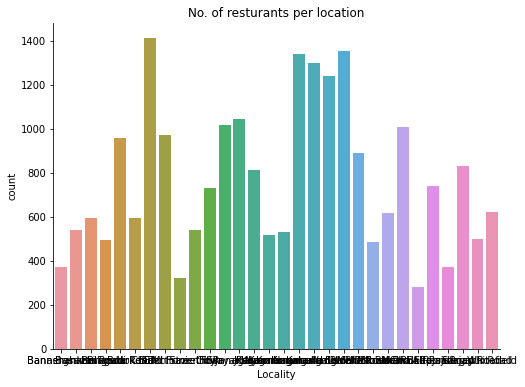

In [ ]:
plt.figure(figsize=(8,6))
plt.title("No. of resturants per location")
sns.countplot(x='Locality', data=zomato_df)
sns.despine()
print(zomato_df.Locality.value_counts())

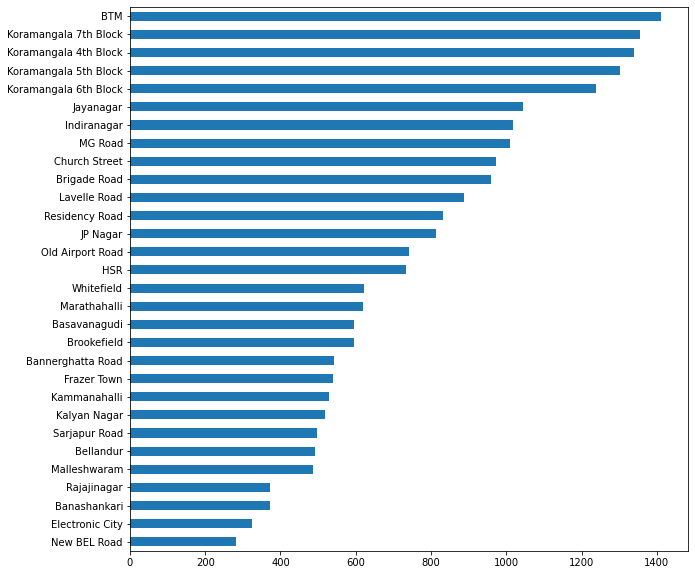

In [ ]:
plt.figure(figsize=(10,10))
zomato_df.Locality.value_counts(ascending=True).plot.barh();

BTM has maximum number of resturants

Types of resturants

Delivery              10572
Dine-out               7938
Desserts               1326
Cafes                  1043
Drinks & nightlife      877
Buffet                  760
Pubs and bars           525
Name: Listed_Type, dtype: int64

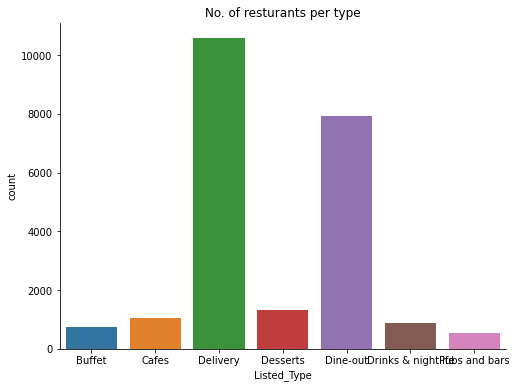

In [ ]:
#Listed type
plt.figure(figsize=(8,6))
plt.title("No. of resturants per type")
sns.countplot(x='Listed_Type', data=zomato_df)
sns.despine()
zomato_df['Listed_Type'].value_counts()

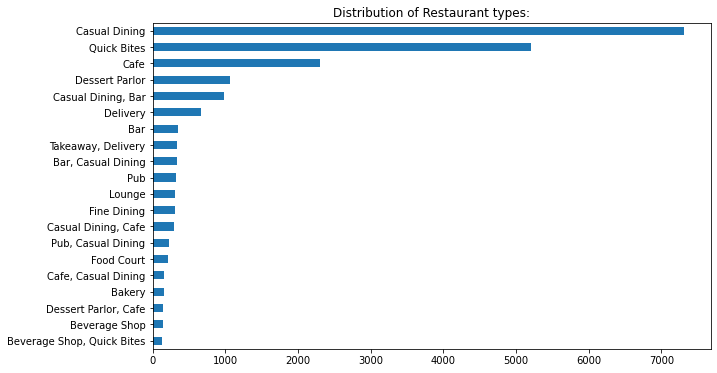

In [ ]:
#Resturant type
plt.figure(figsize=(10, 6))
zomato_df.Restaurant_Type.value_counts(ascending=True).tail(20).plot.barh();
plt.title('Distribution of Restaurant types:');

In [ ]:
Cost= zomato_df.Approx_Cost

print("Average of tyhe approximate cost for two people is = ", np.mean(Cost))

Average of tyhe approximate cost for two people is =  754.8582960808993


In [ ]:
from wordcloud import WordCloud

In [ ]:
z = zomato_df['Dishes_Liked'].dropna()

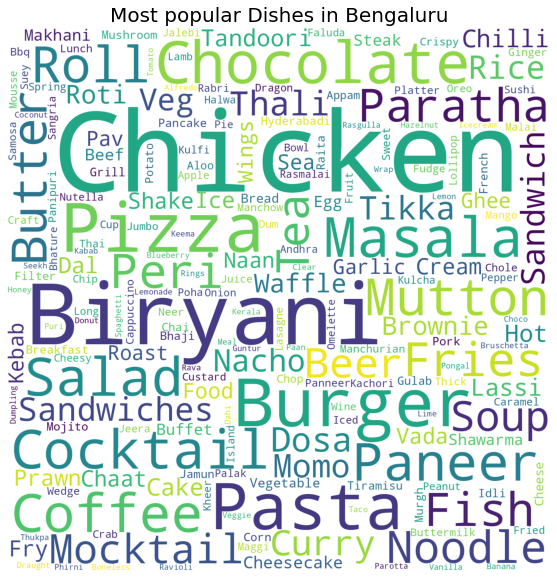

In [ ]:
c1 = ' '.join([text for text in z])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white', collocations = False, width=1500, height=1500).generate(c1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most popular Dishes in Bengaluru', size = 20)
plt.show()

Biriyani is most liked dish

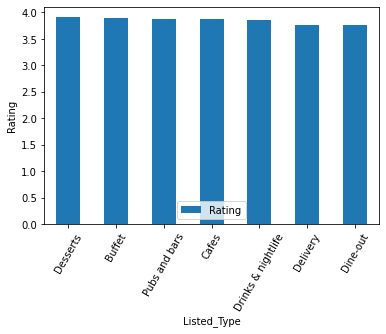

In [ ]:
zomato_df.groupby(['Listed_Type'])['Rating'].agg(np.mean).reset_index(). set_index('Listed_Type').sort_values(['Rating'], ascending = False).plot.bar();
plt.xticks(rotation = 60);
plt.ylabel('Rating');

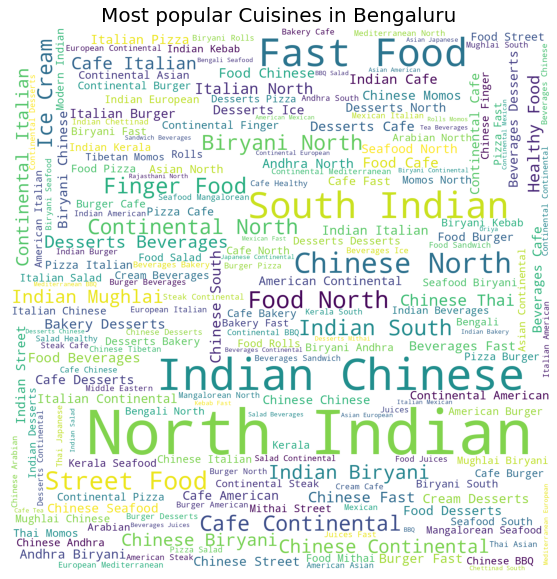

In [ ]:
c2 = ' '.join([st for st in zomato_df['Cuisine']])
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white', collocations = True, width=1500, height=1500).generate(c2)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most popular Cuisines in Bengaluru', size = 20)
plt.show()

Applying Linear Regression

Before we apply Linear regression, we need to do somer more cleaning of the dataset

In [ ]:
zomato_df.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
def Encode(zomato_df):
    for column in zomato_df.columns[~zomato_df.columns.isin(['Rating', 'Approx_Cost', 'Total_Votes'])]:
        zomato_df[column] = zomato_df[column].factorize()[0]
    return zomato_df

zomato_en = Encode(zomato_df.copy())

In [ ]:
zomato_en.head()

,Name,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,0,0,0,4.1,775,0,0,0,800,0,0
1,1,0,1,4.1,787,0,1,1,800,0,0
2,2,0,1,3.8,918,1,2,2,800,0,0
3,3,1,1,3.7,88,2,3,3,300,0,0
4,4,1,1,3.8,166,0,4,4,600,0,0


In [ ]:
#zomato_df['Listed_Type'] = labelencoder_df.fit_transform(zomato_df['Listed_Type'])

In [ ]:
zomato_en.drop(['Name'], axis=1,inplace = True)

In [ ]:
zomato_en.head()

,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,0,0,4.1,775,0,0,0,800,0,0
1,0,1,4.1,787,0,1,1,800,0,0
2,0,1,3.8,918,1,2,2,800,0,0
3,1,1,3.7,88,2,3,3,300,0,0
4,1,1,3.8,166,0,4,4,600,0,0


In [ ]:
#zomato_df.drop(['Locality'], axis=1,inplace = True)

In [ ]:
#zomato_df.drop(['Restaurant_Type'], axis=1,inplace = True)

In [ ]:
#zomato_df.drop(['Dishes_Liked'], axis=1,inplace = True)

In [ ]:
#zomato_df.drop(['Cuisine'], axis=1,inplace = True)

In [ ]:
zomato_df.head()

,Online_Order,Table_Booking,Rating,Total_Votes,Approx_Cost,Listed_Type
0,1,1,4.1,775,800,0
1,1,0,4.1,787,800,0
2,1,0,3.8,918,800,0
3,0,0,3.7,88,300,0
4,0,0,3.8,166,600,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split

<AxesSubplot:>

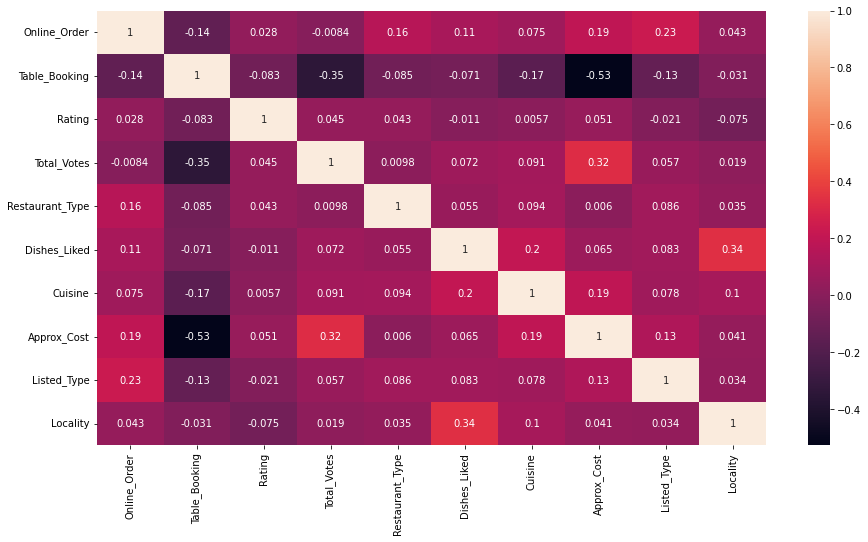

In [ ]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [ ]:
zomato_en.head()

,Online_Order,Table_Booking,Rating,Total_Votes,Restaurant_Type,Dishes_Liked,Cuisine,Approx_Cost,Listed_Type,Locality
0,0,0,4.1,775,0,0,0,800,0,0
1,0,1,4.1,787,0,1,1,800,0,0
2,0,1,3.8,918,1,2,2,800,0,0
3,1,1,3.7,88,2,3,3,300,0,0
4,1,1,3.8,166,0,4,4,600,0,0


In [ ]:
x = zomato_en.iloc[:,[0,1,3,4,5,6,7,8,9]]
y = zomato_en['Rating']

In [ ]:
#splitting of dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 353)

Linear Regression

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred1=reg.predict(x_test)
from sklearn.metrics import r2_score
lr_acc = round(r2_score(y_test,y_pred1)*100, 2)
lr_acc

3.99

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict2=DTree.predict(x_test)
dt_acc = round(r2_score(y_test,y_predict2)*100, 2)
dt_acc

34.25

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict3=RForest.predict(x_test)
rfc_acc = round(r2_score(y_test,y_predict3)*100, 2)
rfc_acc

47.1

Extra Tree Regression

In [ ]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict4=ETree.predict(x_test)
from sklearn.metrics import r2_score
etr_acc = round(r2_score(y_test,y_predict4)*100, 2)
etr_acc

52.99

In [ ]:
!pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


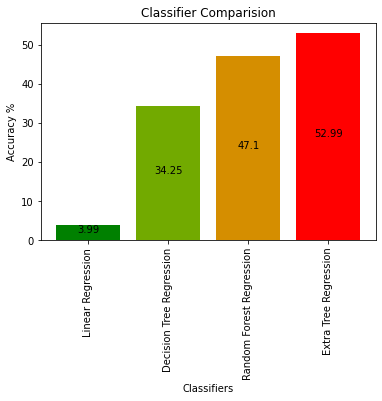

In [ ]:
x = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", "Extra Tree Regression"]
y = [lr_acc, dt_acc, rfc_acc, etr_acc]

from colour import Color
green = Color("green")
colors = list(green.range_to(Color("red"),4))
colors = [color.rgb for color in colors]

def add_value_label(x_list,y_list):
    for i in range(len(x)):
        plt.text(i,y[i]/2,y[i],  ha="center")

plt.bar(x, y, color=colors)
plt.xlabel('Classifiers')
plt.ylabel("Accuracy %")
plt.title('Classifier Comparision')
plt.xticks(rotation='vertical')
add_value_label(x,y)


        
plt.show()

Prediction

In [ ]:
y_predict4

array([3.871 , 3.6435, 3.5429, ..., 3.31  , 4.0439, 3.9728])